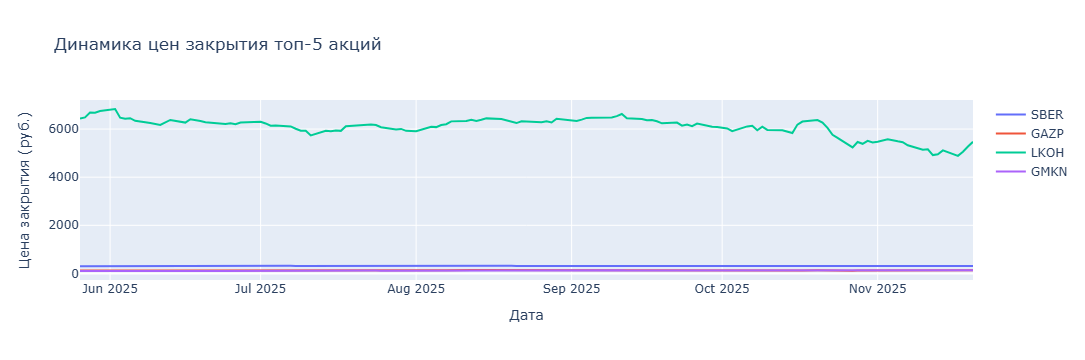

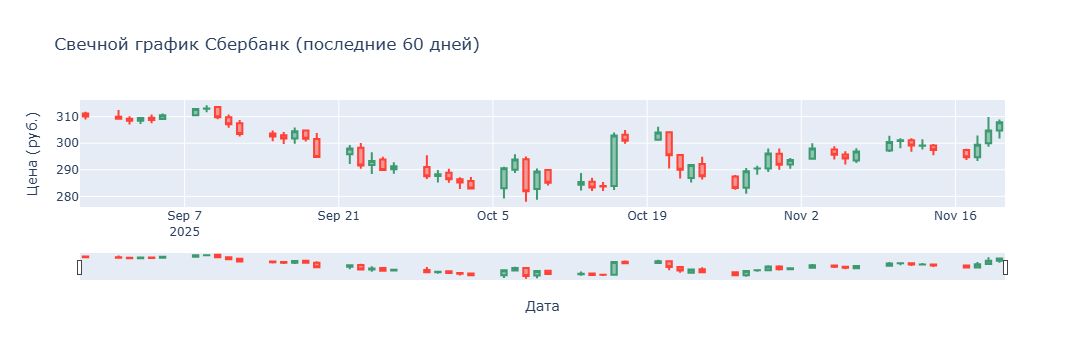

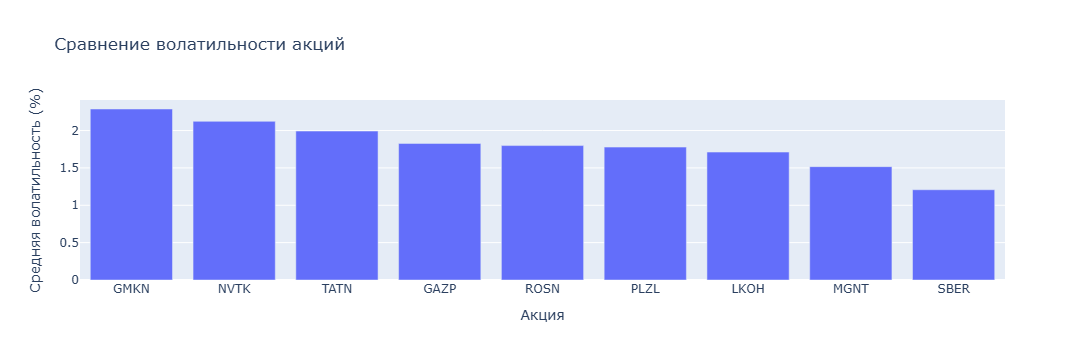

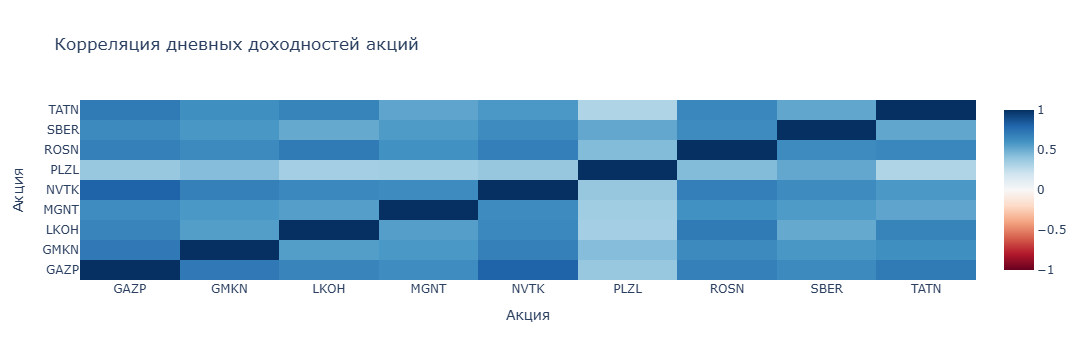

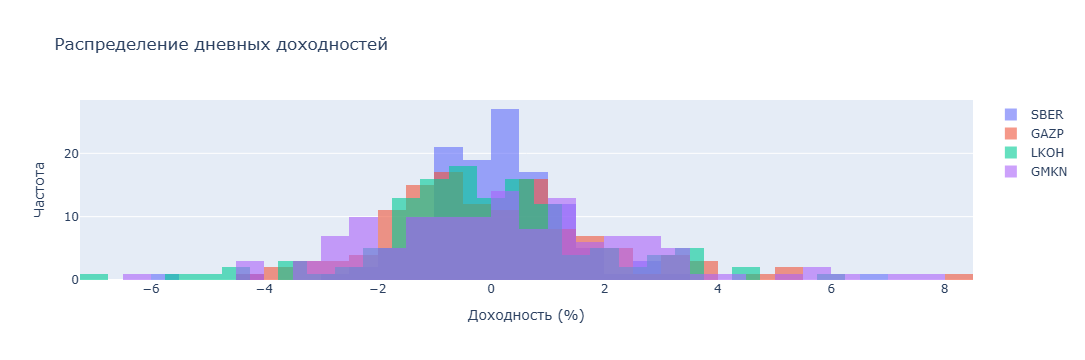


=== Статистика по акциям ===

      DAILY_RETURN             VOLUME    CLOSE         
              mean   std         mean      min      max
SECID                                                  
GAZP          0.03  1.96  70675533.20   114.22   142.53
GMKN          0.25  2.35  22182173.91   100.04   134.34
LKOH         -0.11  1.99   1075212.26  4886.00  6834.00
MGNT         -0.18  1.69    338918.30  2810.00  3948.00
NVTK          0.12  2.30   3476825.28   991.40  1278.80
PLZL          0.23  1.92   1133394.02  1653.60  2386.60
ROSN          0.02  1.92   5375868.38   370.15   487.35
SBER          0.04  1.36  32519494.59   281.90   327.05
TATN         -0.03  2.33   2143811.48   517.10   728.70


In [1]:
import pandas as pd
import plotly.graph_objects as go
import plotly.express as px
from plotly.subplots import make_subplots

# Загрузка обработанных данных
df_daily = pd.read_csv('data/moex_processed_daily.csv', parse_dates=['TRADEDATE'])
df_weekly = pd.read_csv('data/moex_processed_weekly.csv', parse_dates=['TRADEDATE'])

# 1. График динамики цен топ-5 акций
fig1 = go.Figure()

top_5 = ['SBER', 'GAZP', 'LKOH', 'GMKN', 'YNDX']

for secid in top_5:
    df_sec = df_daily[df_daily['SECID'] == secid]
    fig1.add_trace(go.Scatter(
        x=df_sec['TRADEDATE'],
        y=df_sec['CLOSE'],
        mode='lines',
        name=secid
    ))

fig1.update_layout(
    title='Динамика цен закрытия топ-5 акций',
    xaxis_title='Дата',
    yaxis_title='Цена закрытия (руб.)',
    hovermode='x unified'
)

fig1.show()

# 2. Свечной график для одной акции (например, SBER)
df_sber = df_daily[df_daily['SECID'] == 'SBER'].tail(60)  # Последние 60 дней

fig2 = go.Figure(data=[go.Candlestick(
    x=df_sber['TRADEDATE'],
    open=df_sber['OPEN'],
    high=df_sber['HIGH'],
    low=df_sber['LOW'],
    close=df_sber['CLOSE'],
    name='SBER'
)])

fig2.update_layout(
    title='Свечной график Сбербанк (последние 60 дней)',
    xaxis_title='Дата',
    yaxis_title='Цена (руб.)'
)

fig2.show()

# 3. Сравнение волатильности акций
volatility_summary = df_daily.groupby('SECID')['VOLATILITY_7'].mean().sort_values(ascending=False)

fig3 = px.bar(
    x=volatility_summary.index,
    y=volatility_summary.values,
    labels={'x': 'Акция', 'y': 'Средняя волатильность (%)'},
    title='Сравнение волатильности акций'
)

fig3.show()

# 4. Корреляция между доходностями акций
# Создаем pivot таблицу: строки = даты, столбцы = акции, значения = доходность
pivot_returns = df_daily.pivot_table(
    index='TRADEDATE',
    columns='SECID',
    values='DAILY_RETURN'
)

correlation_matrix = pivot_returns.corr()

fig4 = go.Figure(data=go.Heatmap(
    z=correlation_matrix.values,
    x=correlation_matrix.columns,
    y=correlation_matrix.columns,
    colorscale='RdBu',
    zmid=0
))

fig4.update_layout(
    title='Корреляция дневных доходностей акций',
    xaxis_title='Акция',
    yaxis_title='Акция'
)

fig4.show()

# 5. Распределение дневных доходностей
fig5 = go.Figure()

for secid in top_5:
    df_sec = df_daily[df_daily['SECID'] == secid]
    fig5.add_trace(go.Histogram(
        x=df_sec['DAILY_RETURN'],
        name=secid,
        opacity=0.6,
        nbinsx=50
    ))

fig5.update_layout(
    title='Распределение дневных доходностей',
    xaxis_title='Доходность (%)',
    yaxis_title='Частота',
    barmode='overlay'
)

fig5.show()

# 6. Статистика
print("\n=== Статистика по акциям ===\n")
stats = df_daily.groupby('SECID').agg({
    'DAILY_RETURN': ['mean', 'std'],
    'VOLUME': 'mean',
    'CLOSE': ['min', 'max']
}).round(2)

print(stats)